# Linear Regression - medical insurance

In [88]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

In [2]:
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [7]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

# Outliers

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Check outliers in the age column

<Axes: xlabel='age', ylabel='Density'>

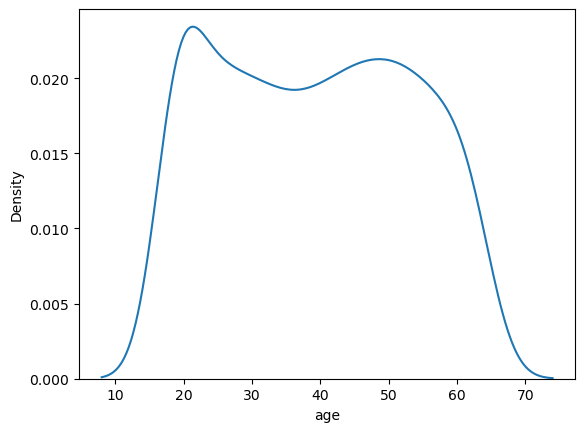

In [10]:
sns.kdeplot(df['age'])

In [11]:
df['age'].skew()

np.float64(0.05567251565299186)

In [12]:
q1 = df['age'].quantile(0.25)
q2 = df['age'].quantile(0.50)
q3 = df['age'].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

Lower_tail = q1 - 1.5 * iqr
Upper_Tail = q3 + 1.5 * iqr

print("Upper tail >> ",Upper_Tail)
print("Lower tail >>",Lower_tail)

IQR >>  24.0
Upper tail >>  87.0
Lower tail >> -9.0


In [13]:
np.where(df['age'] > Upper_Tail)

(array([], dtype=int64),)

In [14]:
np.where(df['age'] < Lower_tail)

(array([], dtype=int64),)

<Axes: xlabel='age'>

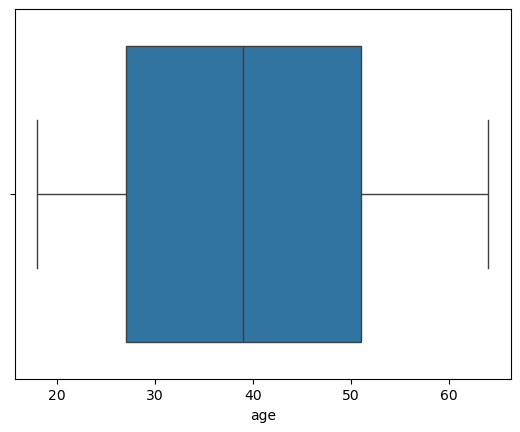

In [15]:
sns.boxplot(x= df['age'])

In [16]:
# Check outliers in the bmi column

<Axes: xlabel='bmi', ylabel='Density'>

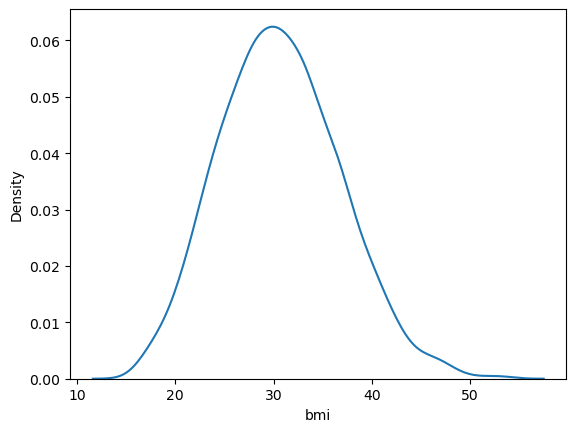

In [17]:
sns.kdeplot(df['bmi'])

In [18]:
df['bmi'].skew()

np.float64(0.2840471105987448)

In [19]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

Lower_tail = q1 - 1.5 * iqr
Upper_Tail = q3 + 1.5 * iqr

print("Upper tail >> ",Upper_Tail)
print("Lower tail >>",Lower_tail)

IQR >>  8.3975
Upper tail >>  47.290000000000006
Lower tail >> 13.7


In [20]:
np.where(df['bmi'] > Upper_Tail)

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317]),)

In [21]:
np.where(df['age'] < Lower_tail)

(array([], dtype=int64),)

<Axes: xlabel='bmi'>

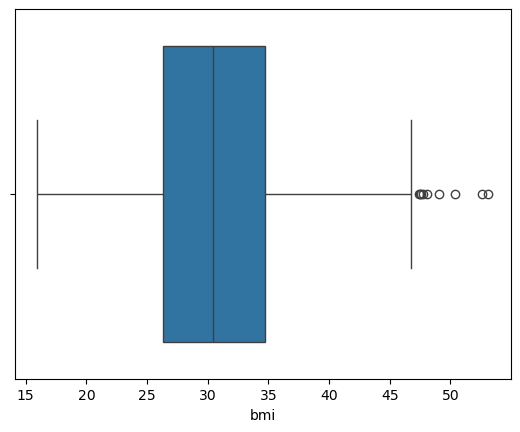

In [22]:
sns.boxplot(x= df['bmi'])

In [23]:
# There are some outliers present in bmi 
# Use Imputation technique : Replace the Outliers with mean value

In [24]:
np.where(df['bmi'] > Upper_Tail)

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317]),)

In [25]:
df['bmi'].mean()

np.float64(30.66339686098655)

In [26]:
mean_value = df.loc[np.where(df['bmi'] < Upper_Tail),'bmi'].mean()
mean_value

np.float64(30.53734762979684)

In [27]:
df['bmi'] = np.where(df['bmi'] > Upper_Tail,mean_value,df['bmi'])

In [28]:
np.where(df['bmi'] > Upper_Tail)

(array([], dtype=int64),)

In [29]:
# Check outliers in the Children column

<Axes: xlabel='children', ylabel='Density'>

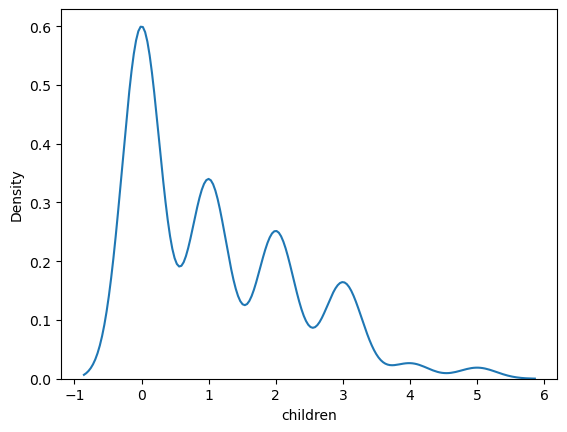

In [30]:
sns.kdeplot(df['children'])

In [31]:
df['children'].skew()

np.float64(0.9383804401702414)

In [32]:
q1 = df['children'].quantile(0.25)
q2 = df['children'].quantile(0.50)
q3 = df['children'].quantile(0.75)

iqr = q3 - q1
print("IQR >> ",iqr)

Lower_tail = q1 - 1.5 * iqr
Upper_Tail = q3 + 1.5 * iqr

print("Upper tail >> ",Upper_Tail)
print("Lower tail >>",Lower_tail)

IQR >>  2.0
Upper tail >>  5.0
Lower tail >> -3.0


In [33]:
np.where(df['children'] > Upper_Tail)

(array([], dtype=int64),)

In [34]:
np.where(df['children'] < Lower_tail)

(array([], dtype=int64),)

<Axes: xlabel='children'>

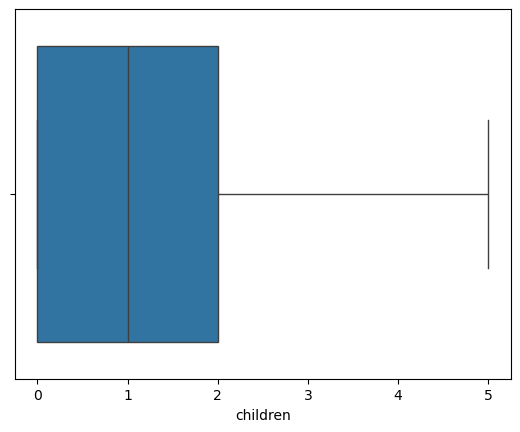

In [35]:
sns.boxplot(x= df['children'])

# EDA

## 1. Correlation:

In [36]:
df['sex'].replace({'female':0,'male':1},inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_2812\2997614052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace({'female':0,'male':1},inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_2812\2997614052.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace({'fe

In [37]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [38]:
df['smoker'].replace({'no':1,'yes':0},inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_2812\1585703698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace({'no':1,'yes':0},inplace = True)
C:\Users\User\AppData\Local\Temp\ipykernel_2812\1585703698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'].replace({'n

In [39]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [40]:
df = pd.get_dummies(df ,columns=['region'])
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,0,16884.92400,False,False,False,True
1,18,1,33.770,1,1,1725.55230,False,False,True,False
2,28,1,33.000,3,1,4449.46200,False,False,True,False
3,33,1,22.705,0,1,21984.47061,False,True,False,False
4,32,1,28.880,0,1,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,10600.54830,False,True,False,False
1334,18,0,31.920,0,1,2205.98080,True,False,False,False
1335,18,0,36.850,0,1,1629.83350,False,False,True,False
1336,21,0,25.800,0,1,2007.94500,False,False,False,True


In [41]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 68.1 KB


In [43]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.114282,0.042469,0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.039824,0.017163,-0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.114282,0.039824,1.000000,0.017331,0.002856,0.190752,-0.135903,-0.128458,0.253986,0.000650
children,0.042469,0.017163,0.017331,1.000000,-0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,0.025019,-0.076185,0.002856,-0.007673,1.000000,-0.787251,-0.002811,0.036945,-0.068498,0.036945
charges,0.299008,0.057292,0.190752,0.067998,-0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.135903,-0.022808,-0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.128458,0.024806,0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.253986,-0.023066,-0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,0.000650,0.021914,0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [44]:
corr = corr.iloc[[5], :5]
corr

,age,sex,bmi,children,smoker
charges,0.299008,0.057292,0.190752,0.067998,-0.787251


<Axes: >

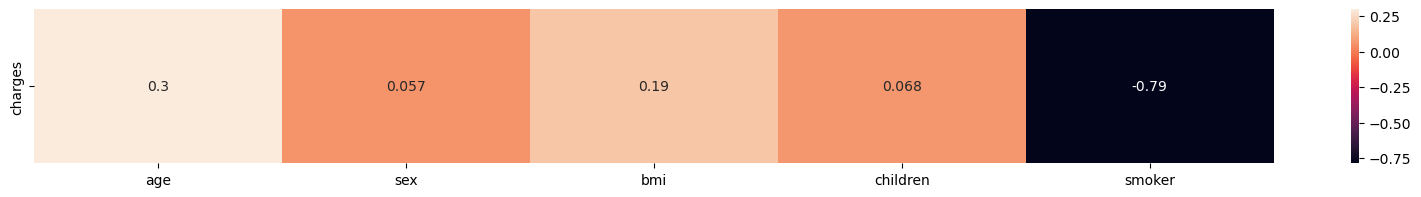

In [45]:
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot  = True)

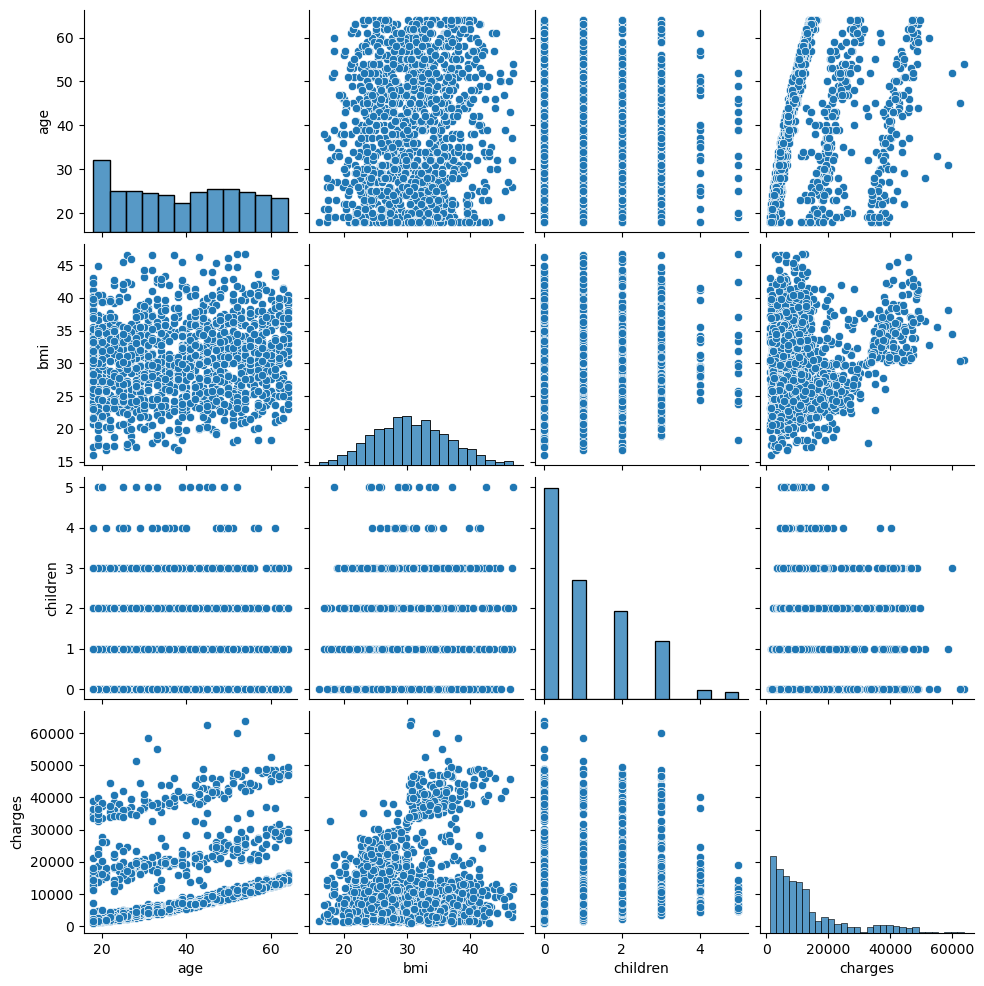

In [46]:
pairplot_df = df[['age', 'bmi', 'children', 'charges']]
sns.pairplot(pairplot_df)

## 2 VIF

In [47]:
df.var()

age                 1.974014e+02
sex                 2.501596e-01
bmi                 3.480986e+01
children            1.453213e+00
smoker              1.629689e-01
charges             1.466524e+08
region_northeast    1.836519e-01
region_northwest    1.840371e-01
region_southeast    1.981859e-01
region_southwest    1.840371e-01
dtype: float64

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
X = df[['age', 'bmi', 'children', 'charges']]
X_array = X.to_numpy()

In [50]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_array, i) for i in range(X_array.shape[1])]

print(vif_data)

    feature       VIF
0       age  8.224480
1       bmi  8.168516
2  children  1.803404
3   charges  2.468453


## KDE plots for Numerical Features

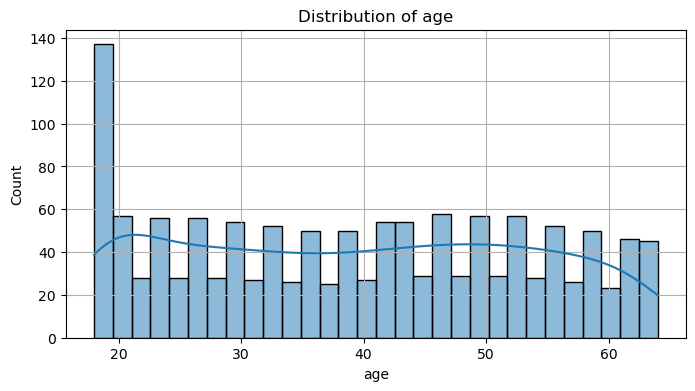

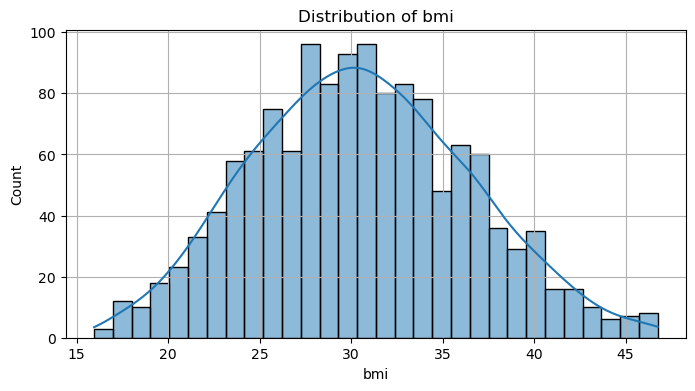

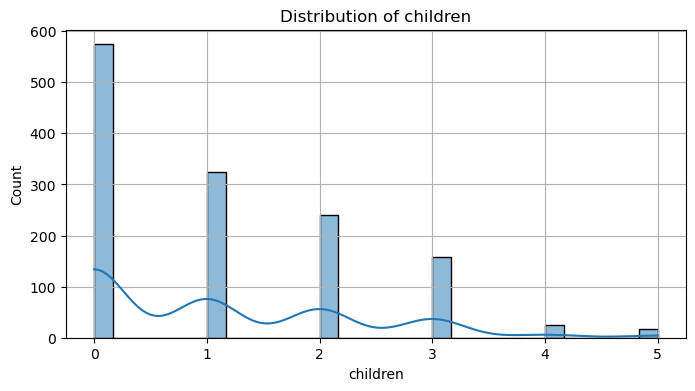

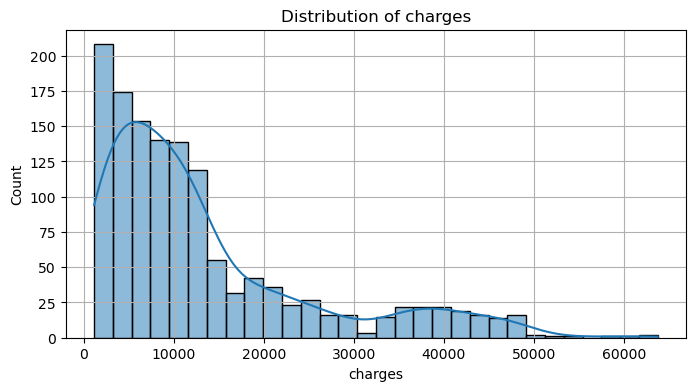

In [51]:
num_cols = ['age', 'bmi', 'children', 'charges']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

## Countplots for Categorical Features

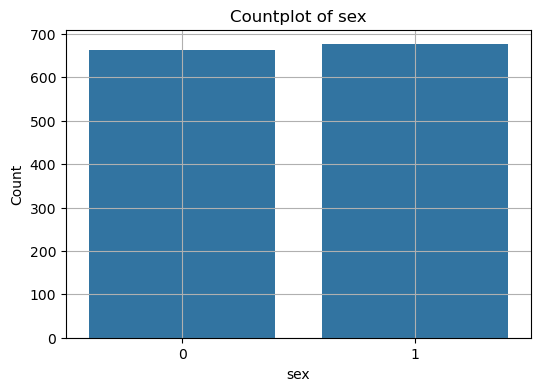

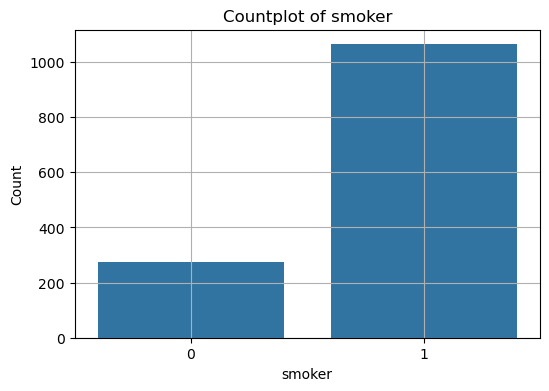

In [52]:
cat_cols = ['sex', 'smoker']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

## Train Test split

In [53]:
df = df.select_dtypes(exclude=object) 
x = df.drop('charges',axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [54]:
x_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
414,19,0,35.150,0,1,False,True,False,False
1279,25,0,26.790,2,1,False,True,False,False
647,40,0,23.370,3,1,True,False,False,False
764,45,0,25.175,2,1,True,False,False,False
1133,52,0,18.335,0,1,False,True,False,False
...,...,...,...,...,...,...,...,...,...
453,20,1,29.735,0,1,False,True,False,False
324,29,1,27.200,0,1,False,False,False,True
1109,45,1,20.350,3,1,False,False,True,False
490,19,0,32.900,0,1,False,False,False,True


In [55]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

# Model Training

In [56]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [57]:
# Testing Data Evaluation
y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 41818238.99299345
RMSE : 6466.702327538624
MAE : 4434.471580208492
R-Squared : 0.7427929253659243


In [58]:
# Training Data Evaluation

y_pred_train = lr_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 35501452.77870286
RMSE : 5958.309557139748
MAE : 4094.6052654628547
R-Squared : 0.7505023129582472


In [59]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [60]:
# Testing Data Evaluation
y_pred = dt_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 55708425.8346718
RMSE : 7463.807730285648
MAE : 3951.7827087611945
R-Squared : 0.657360003997155


In [61]:
# Training Data Evaluation

y_pred_train = dt_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 73028.23141588499
RMSE : 270.2373612509658
MAE : 11.683379953271027
R-Squared : 0.9994867710079194


In [62]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [63]:
# Testing Data Evaluation
y_pred = rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 24860665.923250176
RMSE : 4986.047124050291
MAE : 2805.2533631755114
R-Squared : 0.8470920988173226


In [64]:
# Training Data Evaluation

y_pred_train = rf_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 3369081.423549505
RMSE : 1835.5057677788716
MAE : 987.488098932928
R-Squared : 0.9763227147950634


In [65]:
ada_model = AdaBoostRegressor(n_estimators=100)
ada_model.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [66]:
# Testing Data Evaluation
y_pred = ada_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 25124197.188502003
RMSE : 5012.404332104704
MAE : 3677.444844957967
R-Squared : 0.8454712245901368


In [67]:
# Training Data Evaluation

y_pred_train = ada_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 23655119.818685904
RMSE : 4863.652929505343
MAE : 3871.9649981253947
R-Squared : 0.8337561643393316


## Hyper Parameter Tunning

In [68]:
dt_reg = DecisionTreeRegressor()


hyperparameter = {'criterion' : ['squared_error', 'absolute_error'],
                 'max_depth' : np.arange(3,8),
                 'min_samples_split':np.arange(2,20),
                 'min_samples_leaf':np.arange(2,15)}

gscv_dt_clf = GridSearchCV(dt_reg,hyperparameter,cv=5)

gscv_dt_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [69]:
gscv_dt_clf.best_estimator_

DecisionTreeRegressor(max_depth=np.int64(4), min_samples_leaf=np.int64(14),
                      min_samples_split=np.int64(4))

In [70]:
#Model Train >> Using Best Hyp parameters

In [75]:
dt_reg_hpt = DecisionTreeRegressor(max_depth=4, 
                      min_samples_leaf=14,
                      min_samples_split=4)
dt_reg_hpt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=14, min_samples_split=4)

In [76]:
# Testing Data Evaluation
y_pred = dt_reg_hpt.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 22452854.854830824
RMSE : 4738.444349660637
MAE : 2590.011781063353
R-Squared : 0.8619015708585401


In [77]:
# Training Data Evaluation

y_pred_train = dt_reg_hpt.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 18931364.424142566
RMSE : 4351.018780026417
MAE : 2458.977436464481
R-Squared : 0.866953849302708


In [89]:
base_est = DecisionTreeRegressor()
ada = AdaBoostRegressor()
hyperparameter = {'estimator': [
        DecisionTreeRegressor(max_depth=2),
        DecisionTreeRegressor(max_depth=3),
        LinearRegression(),
        KNeighborsRegressor(n_neighbors=5),
        KNeighborsRegressor(n_neighbors=10)],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]}
gscv_ada_reg = GridSearchCV(ada,hyperparameter,cv=5)

gscv_ada_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'estimator': [DecisionTreeRegressor(max_depth=2),
                                       DecisionTreeRegressor(max_depth=3),
                                       LinearRegression(),
                                       KNeighborsRegressor(),
                                       KNeighborsRegressor(n_neighbors=10)],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150]})

In [ ]:
#Model Train >> Using Best Hyp parameters

In [90]:
ada_reg_hpt = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.01)
ada_reg_hpt.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.01)

In [92]:
# Testing Data Evaluation
y_pred = ada_reg_hpt.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 23847749.710167915
RMSE : 4883.415783052669
MAE : 2772.3248499818997
R-Squared : 0.8533221367694221


In [91]:
# Training Data Evaluation

y_pred_train = ada_reg_hpt.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 19821472.01128737
RMSE : 4452.131176334247
MAE : 2753.383634335168
R-Squared : 0.8606983367298771


In [96]:
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'AdaBoost': ada_model,
    'Decision Tree with Hyperparameter Tunning' : dt_reg_hpt,
    'Adaboost with Hyperparameter Tunning' : ada_reg_hpt
}
results = []
# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append result as a dictionary
    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

evaluation_df = pd.DataFrame(results)
evaluation_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,4434.471580,4.181824e+07,6466.702328,0.742793
1,Decision Tree,3951.782709,5.570843e+07,7463.807730,0.657360
2,Random Forest,2805.253363,2.486067e+07,4986.047124,0.847092
3,AdaBoost,3677.444845,2.512420e+07,5012.404332,0.845471
4,Decision Tree with Hyperparameter Tunning,2590.011781,2.245285e+07,4738.444350,0.861902
5,Adaboost with Hyperparameter Tunning,2772.324850,2.384775e+07,4883.415783,0.853322


In [97]:
# So the Decision Tree with Hyperparameter Tunning has highest R2 score which is 0.861902
# use Decision Tree with Hyperparameter Tunning as a final model
model = dt_reg_hpt

In [98]:
with open("model.pickle",'wb') as f:
    pickle.dump(model,f)

# Testing on Single Row

In [99]:
x.head(1).T

,0
age,19
sex,0
bmi,27.9
children,0
smoker,0
region_northeast,False
region_northwest,False
region_southeast,False
region_southwest,True


In [100]:
age = 30.0   
sex = 'male'
bmi = 28.3
children = 2
smoker = 'no'
region = 'southwest'

# charges = ?

In [101]:
len(x_train.columns)

9

In [102]:
test_array = np.zeros(len(x_train.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
test_array[0] = age

In [104]:
test_array

array([30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [105]:
test_array[2] = bmi

In [106]:
test_array

array([30. ,  0. , 28.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [107]:
test_array[3] = children

In [108]:
test_array

array([30. ,  0. , 28.3,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [109]:
label_encoded_data = {"sex" : {'female':0,'male':1},
                     'smoker': {'no':1,'yes':0}}
label_encoded_data

{'sex': {'female': 0, 'male': 1}, 'smoker': {'no': 1, 'yes': 0}}

In [110]:
label_encoded_data['sex'][sex]

1

In [111]:
test_array[1] = label_encoded_data['sex'][sex]

In [112]:
test_array

array([30. ,  1. , 28.3,  2. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [113]:
label_encoded_data['smoker'][smoker]

1

In [114]:
test_array[4] = label_encoded_data['smoker'][smoker]

In [115]:
test_array

array([30. ,  1. , 28.3,  2. ,  1. ,  0. ,  0. ,  0. ,  0. ])

In [116]:
region = 'region_' + region
region

'region_southwest'

In [117]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [118]:
region_index = np.where(column_names == region)[0][0]
region_index

np.int64(8)

In [119]:
test_array[region_index] = 1

In [120]:
test_array

array([30. ,  1. , 28.3,  2. ,  1. ,  0. ,  0. ,  0. ,  1. ])

In [121]:
model.predict([test_array])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([5683.79403514])

In [122]:
project_data = {"sex" : {'female':0,'male':1},
                     'smoker': {'no':1,'yes':0},
                'columns': list(x.columns)}
project_data

{'sex': {'female': 0, 'male': 1},
 'smoker': {'no': 1, 'yes': 0},
 'columns': ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [123]:
with open('project_data.json','w') as f:
    json.dump(project_data,f)